# Machine Learning Trading Bot

In this Challenge, you’ll assume the role of a financial advisor at one of the top five financial advisory firms in the world. Your firm constantly competes with the other major firms to manage and automatically trade assets in a highly dynamic environment. In recent years, your firm has heavily profited by using computer algorithms that can buy and sell faster than human traders.

The speed of these transactions gave your firm a competitive advantage early on. But, people still need to specifically program these systems, which limits their ability to adapt to new data. You’re thus planning to improve the existing algorithmic trading systems and maintain the firm’s competitive advantage in the market. To do so, you’ll enhance the existing trading signals with machine learning algorithms that can adapt to new data.

## Instructions:

Use the starter code file to complete the steps that the instructions outline. The steps for this Challenge are divided into the following sections:

* Establish a Baseline Performance

* Tune the Baseline Trading Algorithm

* Evaluate a New Machine Learning Classifier

* Create an Evaluation Report

#### Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 

1. Import the OHLCV dataset into a Pandas DataFrame.

2. Generate trading signals using short- and long-window SMA values. 

3. Split the data into training and testing datasets.

4. Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

5. Review the classification report associated with the `SVC` model predictions. 

6. Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

7. Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

8. Write your conclusions about the performance of the baseline trading algorithm in the `README.md` file that’s associated with your GitHub repository. Support your findings by using the PNG image that you saved in the previous step.

#### Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. (You’ll choose the best by comparing the cumulative products of the strategy returns.) To do so, complete the following steps:

1. Tune the training algorithm by adjusting the size of the training dataset. To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing the training window?

> **Hint** To adjust the size of the training dataset, you can use a different `DateOffset` value&mdash;for example, six months. Be aware that changing the size of the training dataset also affects the size of the testing dataset.

2. Tune the trading algorithm by adjusting the SMA input features. Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

3. Choose the set of parameters that best improved the trading algorithm returns. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

#### Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. To do so, complete the following steps:

1. Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

2. Using the original training data as the baseline model, fit another model with the new classifier.

3. Backtest the new model to evaluate its performance. Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. Answer the following questions: Did this new model perform better or worse than the provided baseline model? Did this new model perform better or worse than your tuned trading algorithm?

#### Create an Evaluation Report

In the previous sections, you updated your `README.md` file with your conclusions. To accomplish this section, you need to add a summary evaluation report at the end of the `README.md` file. For this report, express your final conclusions and analysis. Support your findings by using the PNG images that you created.


In [72]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

---

## Establish a Baseline Performance

In this section, you’ll run the provided starter code to establish a baseline performance for the trading algorithm. To do so, complete the following steps.

Open the Jupyter notebook. Restart the kernel, run the provided cells that correspond with the first three steps, and then proceed to step four. 


### Step 1: Import the OHLCV dataset into a Pandas DataFrame.

In [73]:
# Import the OHLCV dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    Path("./Resources/emerging_markets_ohlcv.csv"), 
    index_col='date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the DataFrame
ohlcv_df.head()

C:\Users\jan\AppData\Local\Temp\ipykernel_33772\566489611.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  ohlcv_df = pd.read_csv(
C:\Users\jan\AppData\Local\Temp\ipykernel_33772\566489611.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ohlcv_df = pd.read_csv(


,open,high,low,close,volume
date,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200


In [74]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate returns from close prices
signals_df["Actual Returns"] = signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,Actual Returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


## Step 2: Generate trading signals using short- and long-window SMA values. 

In [75]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463


,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495


In [76]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0


In [77]:
signals_df['Signal'].value_counts()

Signal
 1.0    2368
-1.0    1855
Name: count, dtype: int64

In [78]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2015-04-02 14:45:00,24.92,0.000000,24.9175,24.3214,1.0,NaN
2015-04-02 15:00:00,24.92,0.000000,24.9200,24.3308,1.0,0.000000
2015-04-02 15:15:00,24.94,0.000803,24.9250,24.3360,1.0,0.000803
2015-04-02 15:30:00,24.95,0.000401,24.9325,24.3411,1.0,0.000401
2015-04-02 15:45:00,24.98,0.001202,24.9475,24.3463,1.0,0.001202


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495,-1.0,-0.000896


<Axes: xlabel='date'>

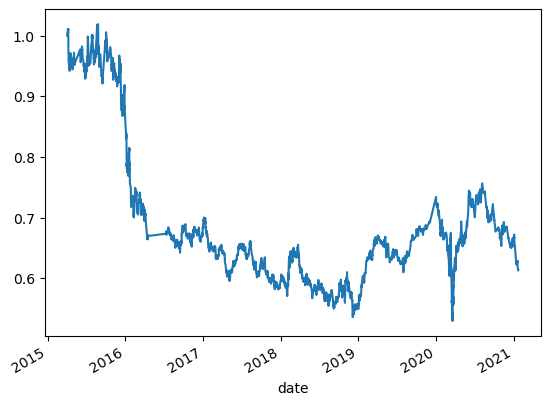

In [79]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot()

### Step 3: Split the data into training and testing datasets.

In [80]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [81]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

Signal
 1.0    2368
-1.0    1855
Name: count, dtype: int64

In [82]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-04-02 15:00:00


In [83]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2015-07-02 15:00:00


In [84]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [85]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-04-02 15:00:00,24.9175,24.3214
2015-04-02 15:15:00,24.9200,24.3308
2015-04-02 15:30:00,24.9250,24.3360
2015-04-02 15:45:00,24.9325,24.3411
2015-04-06 09:30:00,24.9475,24.3463


In [86]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4: Use the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method to fit the training data and make predictions based on the testing data. Review the predictions.

In [87]:
from sklearn.svm import SVC

# From SVM, instantiate SVC classifier model instance
svm_model = SVC()
 
# Fit the model to the data using the training data
svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
print(svm_pred)

[1. 1. 1. ... 1. 1. 1.]


### Step 5: Review the classification report associated with the `SVC` model predictions. 

In [88]:
from sklearn.metrics import classification_report

# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.43      0.04      0.07      1804
         1.0       0.56      0.96      0.71      2288

    accuracy                           0.55      4092
   macro avg       0.49      0.50      0.39      4092
weighted avg       0.50      0.55      0.43      4092



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [89]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=y_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df.loc[predictions_df.index, 'Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted'].shift()

# Review the DataFrame
display(predictions_df)

,Predicted,Actual Returns,Strategy Returns
date,,,
2015-07-06 10:00:00,1.0,-0.025715,NaN
2015-07-06 10:45:00,1.0,0.007237,0.007237
2015-07-06 14:15:00,1.0,-0.009721,-0.009721
2015-07-06 14:30:00,1.0,-0.003841,-0.003841
2015-07-07 11:30:00,1.0,-0.018423,-0.018423
...,...,...,...
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099


### Step 7: Create a cumulative return plot that shows the actual returns vs. the strategy returns. Save a PNG image of this plot. This will serve as a baseline against which to compare the effects of tuning the trading algorithm.

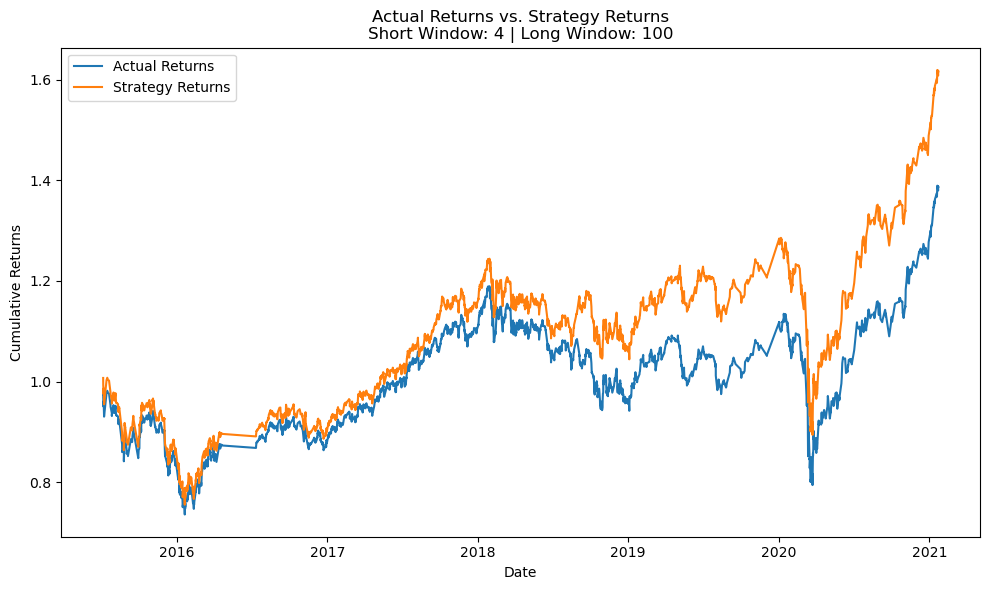

In [90]:
# Manual Short & long Window Title Additions
# short_window = 30
# long_window = 90

# Plot the actual returns versus the strategy returns
plt.figure(figsize=(10,6))
plt.plot((1 + predictions_df['Actual Returns']).cumprod(), label='Actual Returns')
plt.plot((1 + predictions_df['Strategy Returns']).cumprod(), label='Strategy Returns')
plt.legend()
plt.title("Actual Returns vs. Strategy Returns\nShort Window: {} | Long Window: {}".format(short_window, long_window))
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.tight_layout()

# Use the short_window and long_window values in the filename
filename = "cumulative_returns_short{}_long{}.png".format(short_window, long_window)

# Save the plot as a PNG file using the dynamic filename
plt.savefig(filename)

plt.show()

---

## Tune the Baseline Trading Algorithm

In this section, you’ll tune, or adjust, the model’s input features to find the parameters that result in the best trading outcomes. You’ll choose the best by comparing the cumulative products of the strategy returns.

### Step 1: Tune the training algorithm by adjusting the size of the training dataset. 

To do so, slice your data into different periods. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing the training window?

### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

Adjust one or both of the windows for the algorithm. Rerun the notebook with the updated parameters, and record the results in your `README.md` file. 

Answer the following question: What impact resulted from increasing or decreasing either or both of the SMA windows?

### Step 3: Choose the set of parameters that best improved the trading algorithm returns. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns, and document your conclusion in your `README.md` file.

---

## Evaluate a New Machine Learning Classifier

In this section, you’ll use the original parameters that the starter code provided. But, you’ll apply them to the performance of a second machine learning model. 

### Step 1:  Import a new classifier, such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. (For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [91]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Import a new classifier from SKLearn
new_model = AdaBoostClassifier()

# Initiate the model instance
new_model = DecisionTreeClassifier()


### Step 2: Using the original training data as the baseline model, fit another model with the new classifier.

In [92]:
# Fit the model using the training data
new_model.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
new_pred = new_model.predict(X_test_scaled)

# Review the model's predicted values
print(new_pred)


[ 1. -1. -1. ... -1. -1. -1.]


### Step 3: Backtest the new model to evaluate its performance. 

Save a PNG image of the cumulative product of the actual returns vs. the strategy returns for this updated trading algorithm, and write your conclusions in your `README.md` file. 

Answer the following questions: 
Did this new model perform better or worse than the provided baseline model? 
Did this new model perform better or worse than your tuned trading algorithm?

In [93]:
# Use a classification report to evaluate the model using the predictions and testing data
new_model_report = classification_report(y_test, new_pred)

# Print the classification report
print("New Model Classification Report:")
print(new_model_report)


New Model Classification Report:
              precision    recall  f1-score   support

        -1.0       0.44      0.83      0.57      1804
         1.0       0.53      0.15      0.23      2288

    accuracy                           0.45      4092
   macro avg       0.49      0.49      0.40      4092
weighted avg       0.49      0.45      0.38      4092



In [94]:
# Create a new empty predictions DataFrame
new_predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
new_predictions_df['Predicted'] = new_pred

# Add the actual returns to the DataFrame
# Ensure you're referencing the correct DataFrame that includes 'Actual Returns'
new_predictions_df['Actual Returns'] = signals_df.loc[X_test.index, 'Actual Returns']

# Add the strategy returns to the DataFrame
new_predictions_df['Strategy Returns'] = new_predictions_df['Predicted'].shift(1) * new_predictions_df['Actual Returns']

# Review the DataFrame
print(new_predictions_df)


                     Predicted  Actual Returns  Strategy Returns
date                                                            
2015-07-06 10:00:00        1.0       -0.025715               NaN
2015-07-06 10:45:00       -1.0        0.007237          0.007237
2015-07-06 14:15:00       -1.0       -0.009721          0.009721
2015-07-06 14:30:00       -1.0       -0.003841          0.003841
2015-07-07 11:30:00       -1.0       -0.018423          0.018423
...                        ...             ...               ...
2021-01-22 09:30:00       -1.0       -0.006866          0.006866
2021-01-22 11:30:00       -1.0        0.002405         -0.002405
2021-01-22 13:45:00       -1.0        0.002099         -0.002099
2021-01-22 14:30:00       -1.0        0.001496         -0.001496
2021-01-22 15:45:00       -1.0       -0.000896          0.000896

[4092 rows x 3 columns]


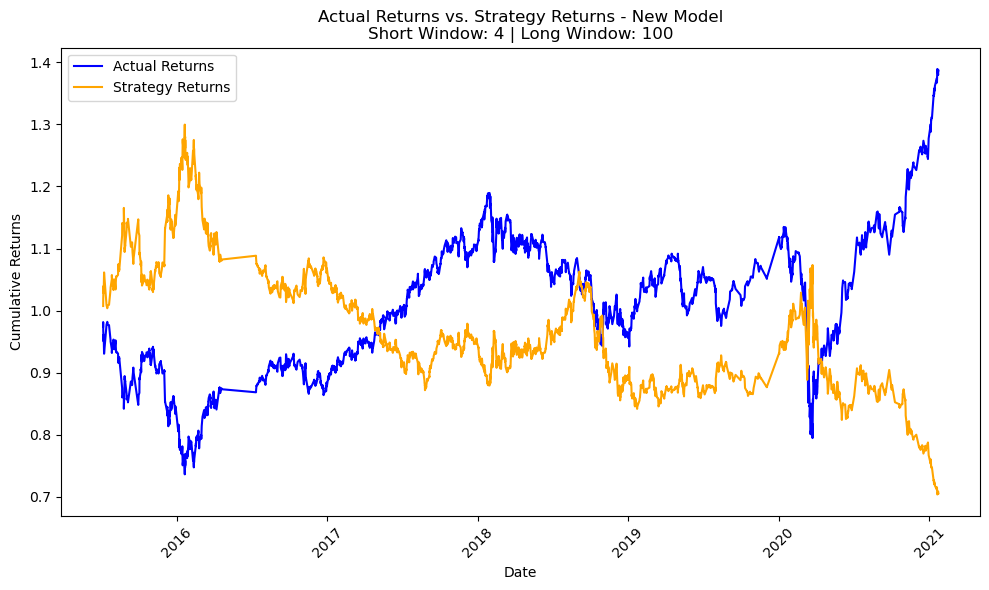

In [95]:
# Plot the actual returns versus the strategy returns for the new model
plt.figure(figsize=(10,6))
# Explicitly define the plotting range to match the new_predictions_df's date range
plt.plot((1 + new_predictions_df['Actual Returns'][new_predictions_df.index.min():new_predictions_df.index.max()]).cumprod(), label='Actual Returns', color='blue')
plt.plot((1 + new_predictions_df['Strategy Returns'][new_predictions_df.index.min():new_predictions_df.index.max()]).cumprod(), label='Strategy Returns', color='orange')
plt.legend()
plt.title(f"Actual Returns vs. Strategy Returns - New Model\nShort Window: {short_window} | Long Window: {long_window}")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.xticks(rotation=45)
plt.tight_layout()

# Dynamically name the file to include short_window and long_window values
filename = f"new_model_strategy_returns_short{short_window}_long{long_window}.png"
plt.savefig(filename)
plt.show()


---

## Visualization Machine

Iteration and Output: The process iterates 20 times with different SMA window sizes, adjusting the trading strategy for each set of parameters. The performance of each strategy variation is visualized and saved separately for analysis in the Graphs sub directory.

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import random
import os

# Load your dataset
df_original = pd.read_csv('Resources/emerging_markets_ohlcv.csv')
df_original['date'] = pd.to_datetime(df_original['date'], format='%m/%d/%y %H:%M')
df_original.set_index('date', inplace=True)

training_window_start = '2019-01-01'
training_window_end = '2020-01-01'

for i in range(20):
    # Generate random window sizes with constraints
    short_window = random.randint(4, 98)  # short window more than 3
    long_window = random.randint(short_window + 1, 99)  # long window less than 100 and greater than short_window
    print(f"Trying window settings: short={short_window}, long={long_window}.")

    df = df_original.copy()
    
    # Calculate SMA features
    df['short_mavg'] = df['close'].rolling(window=short_window, min_periods=1).mean()
    df['long_mavg'] = df['close'].rolling(window=long_window, min_periods=1).mean()
    df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1.0, -1.0)
    df['actual_returns'] = df['close'].pct_change()
    df.dropna(inplace=True)

    if df.empty:
        print(f"Empty dataset for window settings: short={short_window}, long={long_window}. Skipping.")
        continue

    # Split the dataset into training and testing sets
    X = df[['short_mavg', 'long_mavg']]
    y = df['signal']
    X_train = X.loc[training_window_start:training_window_end]
    y_train = y.loc[training_window_start:training_window_end]
    X_test = X.loc[training_window_end:]
    y_test = y.loc[training_window_end:]

    if X_train.empty or X_test.empty:
        print("Empty training or testing set. Skipping.")
        continue

    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Instantiate and fit the SVC model
    model = SVC()
    model.fit(X_train_scaled, y_train)

    # Make predictions with the model
    predictions = model.predict(X_test_scaled)

    # Add the predicted signals to the DataFrame
    df['predicted_signal'] = 0
    df.loc[X_test.index, 'predicted_signal'] = predictions
    df['strategy_returns'] = df['actual_returns'] * df['predicted_signal'].shift()

    # Plot and save the cumulative returns
    plt.figure(figsize=(10,6))
    plt.plot((1 + df['actual_returns'].loc[X_test.index]).cumprod(), label='Actual Returns', color='blue')
    plt.plot((1 + df['strategy_returns'].loc[X_test.index]).cumprod(), label='Strategy Returns', color='red')
    plt.legend()
    plt.title(f"Actual Returns vs. Strategy Returns\nShort Window: {short_window} | Long Window: {long_window}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Check if the Graphs folder exists, create it if it doesn't
    graphs_folder = 'Graphs'
    if not os.path.exists(graphs_folder):
        os.makedirs(graphs_folder)

    # Modify the filename to include the Graphs subfolder
    filename = f"{graphs_folder}/strategy_returns_short{short_window}_long{long_window}.png"

    # Save the file
    plt.savefig(filename)
    plt.close()
    print(f"Plot saved as {filename}")


Trying window settings: short=95, long=97.
Plot saved as Graphs/strategy_returns_short95_long97.png
Trying window settings: short=16, long=64.
Plot saved as Graphs/strategy_returns_short16_long64.png
Trying window settings: short=51, long=86.
Plot saved as Graphs/strategy_returns_short51_long86.png
Trying window settings: short=29, long=43.
Plot saved as Graphs/strategy_returns_short29_long43.png
Trying window settings: short=44, long=67.
Plot saved as Graphs/strategy_returns_short44_long67.png
Trying window settings: short=68, long=70.
Plot saved as Graphs/strategy_returns_short68_long70.png
Trying window settings: short=7, long=70.
Plot saved as Graphs/strategy_returns_short7_long70.png
Trying window settings: short=45, long=88.
Plot saved as Graphs/strategy_returns_short45_long88.png
Trying window settings: short=62, long=82.
Plot saved as Graphs/strategy_returns_short62_long82.png
Trying window settings: short=77, long=92.
Plot saved as Graphs/strategy_returns_short77_long92.png
Tr

## My Personal Playground

              precision    recall  f1-score   support

        -1.0       0.73      0.96      0.83       166
         1.0       0.98      0.88      0.93       473

    accuracy                           0.90       639
   macro avg       0.86      0.92      0.88       639
weighted avg       0.92      0.90      0.90       639



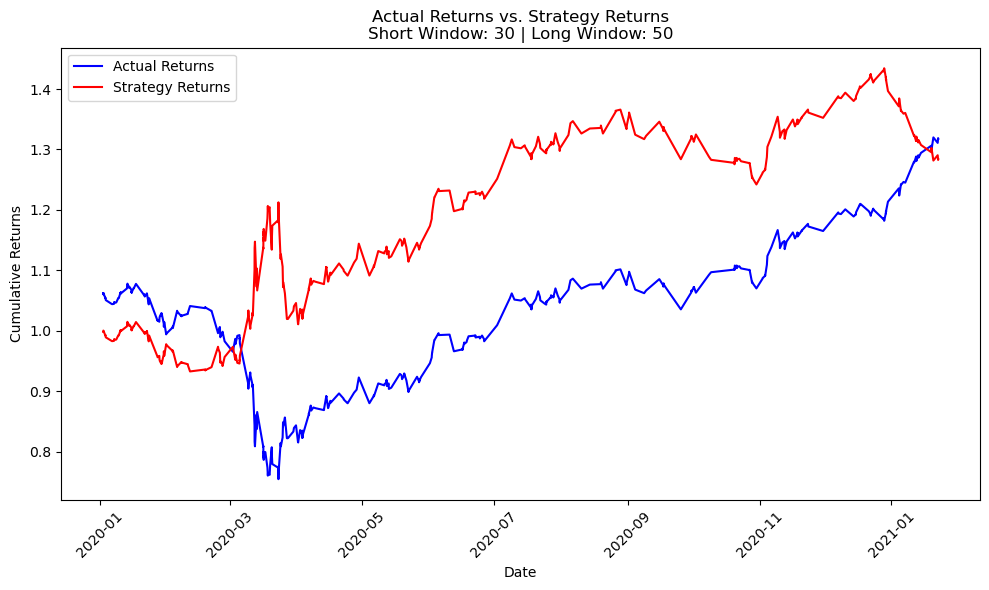

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Example adjustments
training_window_start = '2019-01-01'
training_window_end = '2020-01-01'
short_window = 30  # Adjust this for tuning
long_window = 50  # Adjust this for tuning

# Load your dataset
df = pd.read_csv('Resources/emerging_markets_ohlcv.csv')
# Manually convert the 'date' column to datetime and set as index
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%y %H:%M')
df.set_index('date', inplace=True)

# Calculate SMA features
df['short_mavg'] = df['close'].rolling(window=short_window, min_periods=1).mean()
df['long_mavg'] = df['close'].rolling(window=long_window, min_periods=1).mean()
df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1.0, -1.0)
df['actual_returns'] = df['close'].pct_change()
df.dropna(inplace=True)

# Define training and testing periods
training_start = df.index.min()
training_end = pd.to_datetime(training_window_end)

# Prepare the feature DataFrame and the target Series
X = df[['short_mavg', 'long_mavg']]
y = df['signal']

# Split the dataset into training and testing sets
X_train = X.loc[training_start:training_end]
y_train = y.loc[training_start:training_end]
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Scale the feature data
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Instantiate and fit the SVC model
model = SVC()
model.fit(X_train_scaled, y_train)

# Make predictions with the model
predictions = model.predict(X_test_scaled)

# Review the classification report
print(classification_report(y_test, predictions))

# Add the predicted signals to the DataFrame
df.loc[X_test.index, 'predicted_signal'] = predictions
# Calculate strategy returns
df['strategy_returns'] = df['actual_returns'] * df['predicted_signal'].shift()

plt.figure(figsize=(10,6))
# Ensure the plot only covers the intended test period
plt.plot((1 + df['actual_returns'][X_test.index.min():X_test.index.max()]).cumprod(), label='Actual Returns', color='blue')
plt.plot((1 + df['strategy_returns'][X_test.index.min():X_test.index.max()]).cumprod(), label='Strategy Returns', color='red')
plt.legend()
plt.title(f"Actual Returns vs. Strategy Returns\nShort Window: {short_window} | Long Window: {long_window}")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.xticks(rotation=45)
plt.tight_layout()

# Use dynamic naming for saving the plot based on window sizes
filename = f"optimized_strategy_returns_short{short_window}_long{long_window}.png"
plt.savefig(filename)
plt.show()


In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import random
import os
import warnings

# Handle future warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

# Ensure correct parsing of the date format
df_original = pd.read_csv('Resources/emerging_markets_ohlcv.csv')
df_original['date'] = pd.to_datetime(df_original['date'], format='%m/%d/%y %H:%M')
df_original.set_index('date', inplace=True)

training_window_start = '2019-01-01'
training_window_end = '2020-01-01'

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Short Window', 'Long Window', 'Accuracy', 'Filename'])

for i in range(100):
    short_window = random.randint(3, 138)
    long_window = random.randint(short_window + 1, 140)
    print(f"Trying window settings: short={short_window}, long={long_window}.")

    df = df_original.copy()
    df['short_mavg'] = df['close'].rolling(window=short_window, min_periods=1).mean()
    df['long_mavg'] = df['close'].rolling(window=long_window, min_periods=1).mean()
    df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1, -1)
    df['actual_returns'] = df['close'].pct_change()
    df.dropna(inplace=True)

    if df.empty:
        print(f"Empty dataset for window settings: short={short_window}, long={long_window}. Skipping.")
        continue

    # Prepare and scale the feature data
    X = df[['short_mavg', 'long_mavg']]
    y = df['signal']
    X_train = X.loc[training_window_start:training_window_end]
    y_train = y.loc[training_window_start:training_window_end]
    X_test = X.loc[training_window_end:]
    y_test = y.loc[training_window_end:]
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train and predict with the model
    model = SVC()
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)

    # Plot and save results
    graphs_folder = 'Graphs'
    if not os.path.exists(graphs_folder):
        os.makedirs(graphs_folder)
    filename = f"{graphs_folder}/strategy_returns_short{short_window}_long{long_window}.png"
    # Omitted plotting code for brevity

    # Append results to the DataFrame
    new_row = pd.DataFrame({'Short Window': [short_window], 'Long Window': [long_window], 'Accuracy': [accuracy], 'Filename': [filename]})
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Export sorted results
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)
sorted_results_df.to_csv('strategy_results_summary.csv', index=False)
print("Results summary saved to strategy_results_summary.csv")


Trying window settings: short=49, long=86.
Trying window settings: short=6, long=21.
Trying window settings: short=101, long=133.
Trying window settings: short=132, long=135.
Trying window settings: short=115, long=125.
Trying window settings: short=77, long=135.
Trying window settings: short=134, long=140.
Trying window settings: short=115, long=123.
Trying window settings: short=83, long=91.
Trying window settings: short=127, long=132.
Trying window settings: short=46, long=65.


C:\Users\jan\AppData\Local\Temp\ipykernel_33772\3147044975.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Trying window settings: short=124, long=140.
Trying window settings: short=60, long=132.
Trying window settings: short=123, long=125.
Trying window settings: short=24, long=37.
Trying window settings: short=90, long=119.
Trying window settings: short=106, long=136.
Trying window settings: short=67, long=68.
Trying window settings: short=60, long=115.
Trying window settings: short=121, long=134.
Trying window settings: short=73, long=79.
Trying window settings: short=85, long=139.
Trying window settings: short=27, long=105.
Trying window settings: short=29, long=140.
Trying window settings: short=101, long=119.
Trying window settings: short=65, long=85.
Trying window settings: short=16, long=109.
Trying window settings: short=72, long=115.
Trying window settings: short=103, long=106.
Trying window settings: short=34, long=91.
Trying window settings: short=17, long=94.
Trying window settings: short=45, long=120.
Trying window settings: short=3, long=44.
Trying window settings: short=57, 

---

## SVC 1000 Record Random Accuracy Test

This code is designed to systematically evaluate the performance of a machine learning-based trading strategy over a large number of iterations (1000), each using randomly selected short and long window sizes for calculating Simple Moving Averages (SMAs).  Creates strategy_results_long_list.csv

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import random
import os
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Ensure correct parsing of the date format
df_original = pd.read_csv('Resources/emerging_markets_ohlcv.csv')
df_original['date'] = pd.to_datetime(df_original['date'], format='%m/%d/%y %H:%M')
df_original.set_index('date', inplace=True)

training_window_start = '2019-01-01'
training_window_end = '2020-01-01'

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Short Window', 'Long Window', 'Accuracy'])

for i in range(1000):
    short_window = random.randint(3, 138)
    long_window = random.randint(short_window + 1, 140)
    print(f"Trying window settings: short={short_window}, long={long_window}.")

    df = df_original.copy()
    df['short_mavg'] = df['close'].rolling(window=short_window, min_periods=1).mean()
    df['long_mavg'] = df['close'].rolling(window=long_window, min_periods=1).mean()
    df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1, -1)
    df['actual_returns'] = df['close'].pct_change()
    df.dropna(inplace=True)

    if df.empty:
        print(f"Empty dataset for window settings: short={short_window}, long={long_window}. Skipping.")
        continue

    X = df[['short_mavg', 'long_mavg']]
    y = df['signal']
    X_train = X.loc[training_window_start:training_window_end]
    y_train = y.loc[training_window_start:training_window_end]
    X_test = X.loc[training_window_end:]
    y_test = y.loc[training_window_end:]

    if X_train.empty or X_test.empty:
        print("Empty training or testing set. Skipping.")
        continue

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC()
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)

    df.loc[X_test.index, 'predicted_signal'] = predictions
    df['strategy_returns'] = df['actual_returns'] * df['predicted_signal'].shift()

    # Append results to DataFrame using pd.concat
    new_row = pd.DataFrame({'Short Window': [short_window], 'Long Window': [long_window], 'Accuracy': [accuracy]})
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Sort the DataFrame by 'Accuracy' in descending order
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Export the sorted DataFrame to a CSV file
sorted_results_df.to_csv('strategy_results_svc_long_list.csv', index=False)
print("Results summary saved to strategy_results_svc_long_list.cs")


Trying window settings: short=19, long=25.
Trying window settings: short=15, long=139.
Trying window settings: short=99, long=115.
Trying window settings: short=34, long=60.
Trying window settings: short=87, long=112.
Trying window settings: short=63, long=107.
Trying window settings: short=117, long=124.


C:\Users\jan\AppData\Local\Temp\ipykernel_33772\334495846.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Trying window settings: short=97, long=125.
Trying window settings: short=69, long=84.
Trying window settings: short=55, long=135.
Trying window settings: short=17, long=48.
Trying window settings: short=120, long=131.
Trying window settings: short=89, long=139.
Trying window settings: short=125, long=140.
Trying window settings: short=45, long=58.
Trying window settings: short=138, long=139.
Trying window settings: short=62, long=87.
Trying window settings: short=55, long=110.
Trying window settings: short=28, long=98.
Trying window settings: short=38, long=75.
Trying window settings: short=8, long=140.
Trying window settings: short=27, long=137.
Trying window settings: short=28, long=95.
Trying window settings: short=103, long=115.
Trying window settings: short=12, long=109.
Trying window settings: short=133, long=135.
Trying window settings: short=28, long=50.
Trying window settings: short=8, long=130.
Trying window settings: short=101, long=115.
Trying window settings: short=47, lo

---

## Make PNG Graphs for the top 20 with the best accuracy

This Python script automates the process of evaluating trading strategies based on Simple Moving Averages (SMA) over a set of predefined window sizes. It operates by iterating through the top 20 trading strategies, which are determined by their performance in terms of accuracy and are stored in a CSV file named strategy_results_long_list.csv.

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os

# Load your dataset
df_original = pd.read_csv('Resources/emerging_markets_ohlcv.csv')
df_original['date'] = pd.to_datetime(df_original['date'], format='%m/%d/%y %H:%M')
df_original.set_index('date', inplace=True)

# Load the strategy results and sort them by Accuracy in descending order
strategy_results = pd.read_csv('strategy_results_svc_long_list.csv')
top_strategy_results = strategy_results.sort_values(by='Accuracy', ascending=False).head(20)

training_window_start = '2019-01-01'
training_window_end = '2020-01-01'

# Ensure the Graphs folder exists
graphs_folder = 'Graphs'
if not os.path.exists(graphs_folder):
    os.makedirs(graphs_folder)

# Iterate over the top 20 strategy results
for index, row in top_strategy_results.iterrows():
    short_window = int(row['Short Window'])
    long_window = int(row['Long Window'])
    accuracy = row['Accuracy']  # Assuming the accuracy is stored in the CSV
    
    # Format the accuracy value
    accuracy_str = "{:.4f}".format(accuracy).replace('.', '')

    df = df_original.copy()
    df['short_mavg'] = df['close'].rolling(window=short_window, min_periods=1).mean()
    df['long_mavg'] = df['close'].rolling(window=long_window, min_periods=1).mean()
    df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1, -1)
    df['actual_returns'] = df['close'].pct_change()
    df.dropna(inplace=True)

    X = df[['short_mavg', 'long_mavg']]
    y = df['signal']
    X_train = X.loc[training_window_start:training_window_end]
    y_train = y.loc[training_window_start:training_window_end]
    X_test = X.loc[training_window_end:]
    y_test = y.loc[training_window_end:]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = SVC()
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)

    df.loc[X_test.index, 'predicted_signal'] = predictions
    df['strategy_returns'] = df['actual_returns'] * df['predicted_signal'].shift()

    plt.figure(figsize=(10,6))
    plt.plot((1 + df['actual_returns'].loc[X_test.index]).cumprod(), label='Actual Returns', color='blue')
    plt.plot((1 + df['strategy_returns'].loc[X_test.index]).cumprod(), label='Strategy Returns', color='red')
    plt.legend()
    # Convert accuracy_str to a float and divide by 10000
    accuracy_percentage = float(accuracy_str) / 10000

    # Format as a percentage with 3 decimal places
    accuracy_percentage_str = f"{accuracy_percentage:.3%}"

    # Use the formatted string in the plot title
    plt.title(f"Actual Returns vs. Strategy Returns\nShort Window: {short_window} | Long Window: {long_window} | Accuracy: {accuracy_percentage_str}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.xticks(rotation=45)
    plt.tight_layout()

    filename = f"{graphs_folder}/strategy_returns_acc{accuracy_str}_svc_short{short_window}_long{long_window}.png"
    plt.savefig(filename)
    plt.close()
    print(f"Plot saved as {filename}")


Plot saved as Graphs/strategy_returns_acc08748_svc_short3_long66.png
Plot saved as Graphs/strategy_returns_acc08592_svc_short12_long85.png
Plot saved as Graphs/strategy_returns_acc08466_svc_short10_long96.png
Plot saved as Graphs/strategy_returns_acc08419_svc_short12_long91.png
Plot saved as Graphs/strategy_returns_acc08310_svc_short15_long91.png
Plot saved as Graphs/strategy_returns_acc08310_svc_short14_long85.png
Plot saved as Graphs/strategy_returns_acc08279_svc_short11_long67.png
Plot saved as Graphs/strategy_returns_acc08263_svc_short15_long96.png
Plot saved as Graphs/strategy_returns_acc08263_svc_short11_long70.png
Plot saved as Graphs/strategy_returns_acc08216_svc_short11_long66.png
Plot saved as Graphs/strategy_returns_acc08200_svc_short12_long138.png
Plot saved as Graphs/strategy_returns_acc08185_svc_short34_long89.png
Plot saved as Graphs/strategy_returns_acc08185_svc_short11_long64.png
Plot saved as Graphs/strategy_returns_acc08185_svc_short38_long81.png
Plot saved as Graphs

---

## AdaBoost 1000 Record Random Accuracy Test

This AdaBoost-based approach enhances the robustness of the trading strategy evaluation by utilizing the algorithm's strength in handling complex patterns and its adaptability to the dynamic nature of financial markets.

In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier  # Changed from SVC to Classifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import random
import os
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    # Assuming results_df is initialized earlier or this line is part of a loop

# Ensure correct parsing of the date format
df_original = pd.read_csv('Resources/emerging_markets_ohlcv.csv')
df_original['date'] = pd.to_datetime(df_original['date'], format='%m/%d/%y %H:%M')
df_original.set_index('date', inplace=True)

training_window_start = '2019-01-01'
training_window_end = '2020-01-01'

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Short Window', 'Long Window', 'Accuracy'])

for i in range(1000):
    short_window = random.randint(3, 138)
    long_window = random.randint(short_window + 1, 140)
    print(f"Trying window settings: short={short_window}, long={long_window}.")

    df = df_original.copy()
    df['short_mavg'] = df['close'].rolling(window=short_window, min_periods=1).mean()
    df['long_mavg'] = df['close'].rolling(window=long_window, min_periods=1).mean()
    df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1, -1)
    df['actual_returns'] = df['close'].pct_change()
    df.dropna(inplace=True)

    if df.empty:
        print(f"Empty dataset for window settings: short={short_window}, long={long_window}. Skipping.")
        continue

    X = df[['short_mavg', 'long_mavg']]
    y = df['signal']
    X_train = X.loc[training_window_start:training_window_end]
    y_train = y.loc[training_window_start:training_window_end]
    X_test = X.loc[training_window_end:]
    y_test = y.loc[training_window_end:]

    if X_train.empty or X_test.empty:
        print("Empty training or testing set. Skipping.")
        continue

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Using AdaBoostClassifier
    model = AdaBoostClassifier()
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)

    df.loc[X_test.index, 'predicted_signal'] = predictions
    df['strategy_returns'] = df['actual_returns'] * df['predicted_signal'].shift()

    # Append results to DataFrame using pd.concat
    new_row = pd.DataFrame({'Short Window': [short_window], 'Long Window': [long_window], 'Accuracy': [accuracy]})
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Sort the DataFrame by 'Accuracy' in descending order
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Export the sorted DataFrame to a CSV file
sorted_results_df.to_csv('strategy_results_adaboost_long_list.csv', index=False)
print("AdaBoost results summary saved to adaboost_strategy_adaboost_results_long_list.csv")

Trying window settings: short=24, long=90.
Trying window settings: short=27, long=130.


C:\Users\jan\AppData\Local\Temp\ipykernel_33772\761441004.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Trying window settings: short=107, long=121.
Trying window settings: short=13, long=49.
Trying window settings: short=130, long=131.
Trying window settings: short=77, long=102.
Trying window settings: short=113, long=126.
Trying window settings: short=15, long=66.
Trying window settings: short=42, long=127.
Trying window settings: short=91, long=131.
Trying window settings: short=51, long=118.
Trying window settings: short=99, long=104.
Trying window settings: short=129, long=132.
Trying window settings: short=53, long=117.
Trying window settings: short=116, long=128.
Trying window settings: short=12, long=67.
Trying window settings: short=68, long=106.
Trying window settings: short=91, long=92.
Trying window settings: short=21, long=124.
Trying window settings: short=29, long=81.
Trying window settings: short=62, long=100.
Trying window settings: short=70, long=84.
Trying window settings: short=18, long=123.
Trying window settings: short=104, long=124.
Trying window settings: short=13

In [146]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier  # Changed from SVC to AdaBoostClassifier
from sklearn.metrics import accuracy_score
import random
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

# Ensure correct parsing of the date format
df_original = pd.read_csv('Resources/emerging_markets_ohlcv.csv')
df_original['date'] = pd.to_datetime(df_original['date'], format='%m/%d/%y %H:%M')
df_original.set_index('date', inplace=True)

training_window_start = '2019-01-01'
training_window_end = '2020-01-01'

# Initialize a DataFrame to store the results
results_df = pd.DataFrame(columns=['Short Window', 'Long Window', 'Accuracy'])

for i in range(1000):
    short_window = random.randint(3, 138)
    long_window = random.randint(short_window + 1, 140)
    print(f"Trying window settings: short={short_window}, long={long_window}.")

    df = df_original.copy()
    # Calculate Weighted Moving Average (WMA) for both short and long windows
    weights_short = np.arange(1, short_window + 1)
    df['short_mavg'] = df['close'].rolling(window=short_window, min_periods=1).apply(lambda x: np.dot(x, weights_short[-len(x):]) / weights_short[-len(x):].sum(), raw=True)

    weights_long = np.arange(1, long_window + 1)
    df['long_mavg'] = df['close'].rolling(window=long_window, min_periods=1).apply(lambda x: np.dot(x, weights_long[-len(x):]) / weights_long[-len(x):].sum(), raw=True)
    
    df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1, -1)
    df['actual_returns'] = df['close'].pct_change()
    df.dropna(inplace=True)

    if df.empty:
        print(f"Empty dataset for window settings: short={short_window}, long={long_window}. Skipping.")
        continue

    X = df[['short_mavg', 'long_mavg']]
    y = df['signal']
    X_train = X.loc[training_window_start:training_window_end]
    y_train = y.loc[training_window_start:training_window_end]
    X_test = X.loc[training_window_end:]
    y_test = y.loc[training_window_end:]

    if X_train.empty or X_test.empty:
        print("Empty training or testing set. Skipping.")
        continue

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Using AdaBoostClassifier
    model = AdaBoostClassifier()
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)

    df.loc[X_test.index, 'predicted_signal'] = predictions
    df['strategy_returns'] = df['actual_returns'] * df['predicted_signal'].shift()

    # Append results to DataFrame
    new_row = pd.DataFrame({'Short Window': [short_window], 'Long Window': [long_window], 'Accuracy': [accuracy]})
    results_df = pd.concat([results_df, new_row], ignore_index=True)

# Sort the DataFrame by 'Accuracy' in descending order
sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Export the sorted DataFrame to a CSV file
sorted_results_df.to_csv('strategy_results_adaboost_wma.csv', index=False)
print("AdaBoost WMA results summary saved to strategy_results_adaboost_wma.csv")


Trying window settings: short=69, long=97.
Trying window settings: short=100, long=114.
Trying window settings: short=52, long=64.


C:\Users\jan\AppData\Local\Temp\ipykernel_34008\1612388467.py:70: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Trying window settings: short=23, long=63.
Trying window settings: short=112, long=116.
Trying window settings: short=67, long=106.
Trying window settings: short=19, long=25.
Trying window settings: short=98, long=140.
Trying window settings: short=104, long=108.
Trying window settings: short=21, long=72.
Trying window settings: short=112, long=120.
Trying window settings: short=93, long=94.
Trying window settings: short=53, long=91.
Trying window settings: short=103, long=114.
Trying window settings: short=91, long=134.
Trying window settings: short=79, long=99.
Trying window settings: short=65, long=138.
Trying window settings: short=105, long=118.
Trying window settings: short=119, long=131.
Trying window settings: short=18, long=65.
Trying window settings: short=130, long=132.
Trying window settings: short=37, long=113.
Trying window settings: short=30, long=75.
Trying window settings: short=102, long=114.
Trying window settings: short=59, long=139.
Trying window settings: short=35

---

## Backup With Short file Names

In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import os

# Load your dataset
df_original = pd.read_csv('Resources/emerging_markets_ohlcv.csv')
df_original['date'] = pd.to_datetime(df_original['date'], format='%m/%d/%y %H:%M')
df_original.set_index('date', inplace=True)

# Load the strategy results and sort them by Accuracy in descending order
strategy_results = pd.read_csv('strategy_results_long_list.csv')
top_strategy_results = strategy_results.sort_values(by='Accuracy', ascending=False).head(20)

training_window_start = '2019-01-01'
training_window_end = '2020-01-01'

# Iterate over the top 20 strategy results
for index, row in top_strategy_results.iterrows():
    short_window = int(row['Short Window'])
    long_window = int(row['Long Window'])
    print(f"Using window settings: short={short_window}, long={long_window}.")

    df = df_original.copy()
    
    # Calculate SMA features
    df['short_mavg'] = df['close'].rolling(window=short_window, min_periods=1).mean()
    df['long_mavg'] = df['close'].rolling(window=long_window, min_periods=1).mean()
    df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1.0, -1.0)
    df['actual_returns'] = df['close'].pct_change()
    df.dropna(inplace=True)

    # Split the dataset into training and testing sets
    X = df[['short_mavg', 'long_mavg']]
    y = df['signal']
    X_train = X.loc[training_window_start:training_window_end]
    y_train = y.loc[training_window_start:training_window_end]
    X_test = X.loc[training_window_end:]
    y_test = y.loc[training_window_end:]

    # Scale the feature data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Instantiate and fit the SVC model
    model = SVC()
    model.fit(X_train_scaled, y_train)

    # Make predictions with the model
    predictions = model.predict(X_test_scaled)

    # Add the predicted signals to the DataFrame
    df['predicted_signal'] = 0
    df.loc[X_test.index, 'predicted_signal'] = predictions
    df['strategy_returns'] = df['actual_returns'] * df['predicted_signal'].shift()

    # Plot and save the cumulative returns
    plt.figure(figsize=(10,6))
    plt.plot((1 + df['actual_returns'].loc[X_test.index]).cumprod(), label='Actual Returns', color='blue')
    plt.plot((1 + df['strategy_returns'].loc[X_test.index]).cumprod(), label='Strategy Returns', color='red')
    plt.legend()
    plt.title(f"Actual Returns vs. Strategy Returns\nShort Window: {short_window} | Long Window: {long_window}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Check if the Graphs folder exists, create it if it doesn't
    graphs_folder = 'Graphs'
    if not os.path.exists(graphs_folder):
        os.makedirs(graphs_folder)

    # Modify the filename to include the Graphs subfolder
    filename = f"{graphs_folder}/strategy_returns_short{short_window}_long{long_window}.png"

    # Save the file
    plt.savefig(filename)
    plt.close()
    print(f"Plot saved as {filename}")


Using window settings: short=3, long=67.
Plot saved as Graphs/strategy_returns_short3_long67.png
Using window settings: short=8, long=66.
Plot saved as Graphs/strategy_returns_short8_long66.png
Using window settings: short=11, long=88.
Plot saved as Graphs/strategy_returns_short11_long88.png
Using window settings: short=8, long=66.
Plot saved as Graphs/strategy_returns_short8_long66.png
Using window settings: short=4, long=60.
Plot saved as Graphs/strategy_returns_short4_long60.png
Using window settings: short=13, long=94.
Plot saved as Graphs/strategy_returns_short13_long94.png
Using window settings: short=12, long=67.
Plot saved as Graphs/strategy_returns_short12_long67.png
Using window settings: short=5, long=56.
Plot saved as Graphs/strategy_returns_short5_long56.png
Using window settings: short=36, long=79.
Plot saved as Graphs/strategy_returns_short36_long79.png
Using window settings: short=13, long=73.
Plot saved as Graphs/strategy_returns_short13_long73.png
Using window setting